This code is made to visualize a Hyperspectral Image (HSI).

Inspired by: https://github.com/gokriznastic/HybridSN/blob/master/Hybrid-Spectral-Net.ipynb

In [89]:
import numpy as np
import scipy.io as sio
import os
import matplotlib.pyplot as plt
from configparser import Interpolation

In [90]:
def load_data():

    data_path = os.path.join(os.getcwd(),'data')

    X = sio.loadmat(os.path.join(data_path, 'PaviaU.mat'))['paviaU']
    y = sio.loadmat(os.path.join(data_path, 'PaviaU_gt.mat'))['paviaU_gt']

    return X, y


In [91]:
X, y = load_data()

In [92]:
def display_HSI(spectral_band):
    '''
        Plot a HSI for a given spectral band.
        spectral_band: An index of what spectral band from the image to choose from
    '''

    matrix = X[:,:,spectral_band]
    plt.figure(figsize=(5,5))
    plt.imshow(matrix)

In [93]:
def plot_spectral_graph(x_ax, y_ax):
    '''
        plot the spectral changes in intesity for a certain pixel in a HSI.
        x_ax: index deciding the x-axis of the pixel
        y_ax: index deciding the y-axis of the pixel
    '''

    plt.figure(figsize=(5,5))
    plt.plot(X[y_ax,x_ax,:])

    plt.xlabel("Spectral band")
    plt.ylabel("Intensity")

    plt.grid()
    plt.show()

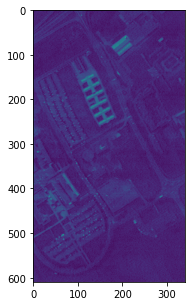

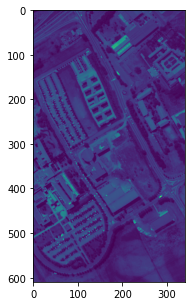

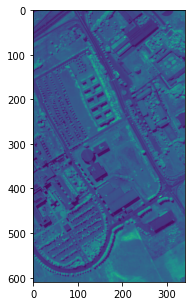

In [94]:
display_HSI(0)
display_HSI(50)
display_HSI(100)

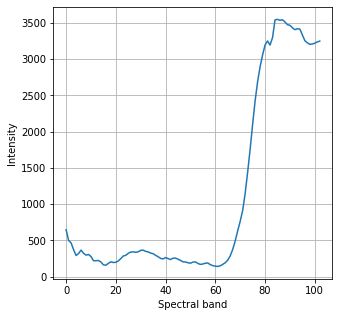

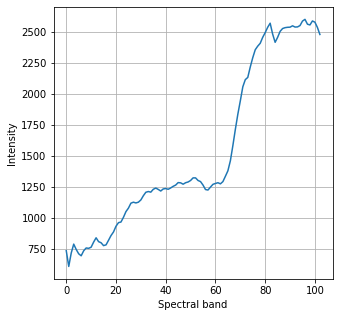

In [95]:
plot_spectral_graph(0,0)
plot_spectral_graph(300,600)